In [58]:
import sympy
import math
import numpy as np
import matplotlib.pyplot as plt
num = 100

In [60]:
# Define a_{i},b_{i} and traits#

avars = [a for a in range(1,num+1)]
bvars = [b for b in range(1,num+1)]
traits = [c for c in range(1,num+1)]

# Numeric Way #

0.9999999999999999


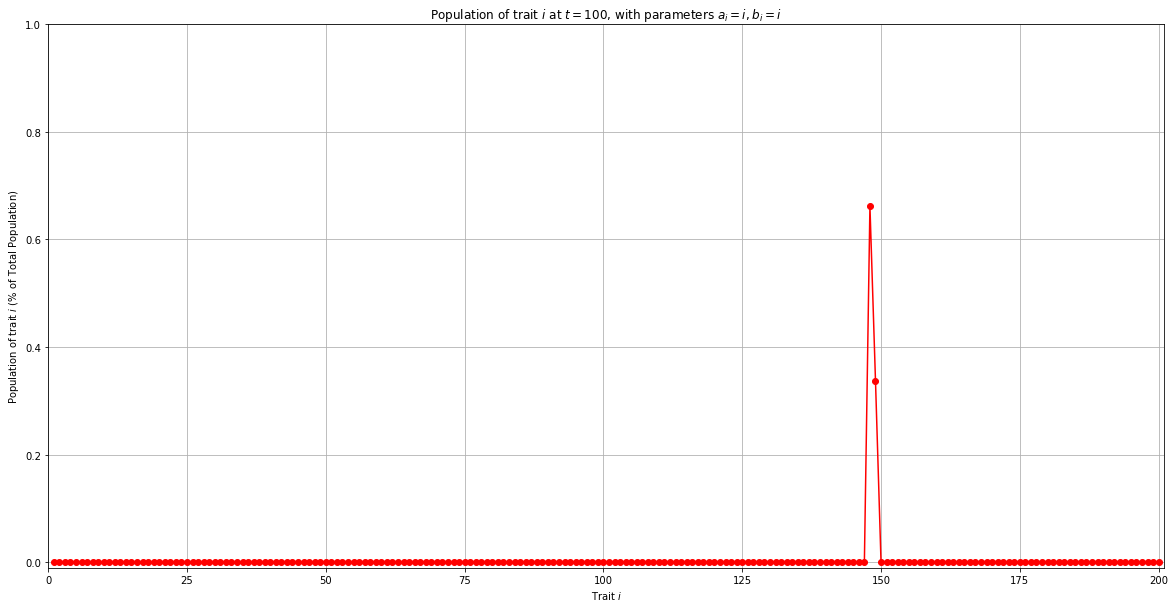

In [63]:
# Create a dictionary to contain each term in the recurrence #
exprs = {}
for k in traits:
    exprs[k] = []
    
# Create list which will update u_{i} each time we iterate #
u = [1/num for l in range(1,num+1)]


# Function that updates the values of u_{i} by continuously applying f(u) to itself
def iterate(expr,u,denom):
    
    aterms = [avars[m-1]*u[m-1] for m in traits]
    bterms = [bvars[m-1]*u[m-1] for m in traits]
    denom = sum(aterms)*sum(bterms)
    
    expr = {}
    for k in traits:
        expr[k] = []
        
    for i in traits:
        for j in traits:
            if (i+j)/2 in traits:
                expr[int((i+j)/2)].append(avars[i-1]*u[i-1]*bvars[j-1]*u[j-1])

            if math.floor((i+j)/2) in traits and not ((i+j)/2).is_integer():
                expr[math.floor((i+j)/2)].append(0.5*avars[i-1]*u[i-1]*bvars[j-1]*u[j-1])

            if math.ceil((i+j)/2) in traits and not ((i+j)/2).is_integer():
                expr[math.ceil((i+j)/2)].append(0.5*avars[i-1]*u[i-1]*bvars[j-1]*u[j-1])
    
    for x in range(len(u)):
        u[x] = sum(expr[x+1])/denom
        
for i in range(100):
    iterate(exprs,u,denom)
    
    
# Plotting the simulation #

fig2 = plt.figure(figsize=(20,10))
plt.xlabel("Trait $i$")
plt.ylabel("Population of trait $i$ (% of Total Population)")
plt.title("Population of trait $i$ at $t = 100$, with parameters $a_{i} = i,b_{i} = i$")
plt.plot([i for i in range(1,num+1)],u,color = 'red',marker = 'o')
plt.grid('True')
plt.axis([0,num+1,-0.01,1])
plt.show()
fig2.savefig("Simulation100.png")

            

# Symbolic Way #

In [89]:
avars = [sympy.Symbol('a'+str(a)) for a in range(1,num+1)]
bvars = [sympy.Symbol('b'+str(b)) for b in range(1,num+1)]
traits = [c for c in range(1,num+1)]

exprs = {}
for k in traits:
    exprs[k] = []
    
u = [sympy.Symbol('u'+str(l)) for l in range(1,num+1)]

In [90]:
for i in traits:
    for j in traits:
        if (i+j)/2 in traits:
            exprs[int((i+j)/2)].append(avars[i-1]*u[i-1]*bvars[i-1]*u[i-1])
            
        if math.floor((i+j)/2) in traits and not ((i+j)/2).is_integer():
            exprs[math.floor((i+j)/2)].append(0.5*avars[i-1]*u[i-1]*bvars[j-1]*u[j-1])
            
        if math.ceil((i+j)/2) in traits and not ((i+j)/2).is_integer():
            exprs[math.ceil((i+j)/2)].append(0.5*avars[i-1]*u[i-1]*bvars[j-1]*u[j-1])

for i in exprs:
    print(exprs[i])
    
### If needed, finish this ####

[a1*b1*u1**2, 0.5*a1*b2*u1*u2, 0.5*a2*b1*u1*u2]
[0.5*a1*b2*u1*u2, 0.5*a2*b1*u1*u2, a2*b2*u2**2]
